# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observable Trends

•	The data had an output of 590 cities and demonstrated that as the latitude neared the equator at 0 degrees the temperature increased. The southern hemisphere scatter plot showed an R-value of 0.68 which is near 0.7 showing this is a strong correlation as well as the northern hemisphere showering an R-Value of 0.9 nearing 1.

•	When looking at the scatter plot of humidity between the southern and northern hemisphere, the only common area they have is that both plots demonstrate that there is no correlation between latitude and humidity. The R-Values were well below 0.7 showing a weak correlation.

•	Another indicator of weak correlation was between city latitude and wind speed. In both the northern and southern hemisphere scatter plots the R-Squared value showed a weak correlation that was well below 0.7.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# cities = pd.read_csv(output_data_file)
# cities.head()

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#used this to check what is in json for next activity

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 35},
 'cod': 200,
 'coord': {'lat': -34.4187, 'lon': 19.2345},
 'dt': 1636520145,
 'id': 3366880,
 'main': {'feels_like': 61.18,
          'grnd_level': 1016,
          'humidity': 72,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 61.9,
          'temp_max': 61.9,
          'temp_min': 61.9},
 'name': 'Hermanus',
 'sys': {'country': 'ZA',
         'id': 2003650,
         'sunrise': 1636515228,
         'sunset': 1636564817,
         'type': 2},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 322, 'gust': 3.15, 'speed': 2.77}}


In [4]:
#make sure there is a response
print(requests.get(query_url+city))

<Response [200]>


In [5]:
query_url = f"{url}appid={weather_api_key}&units={units}&q="
units = "imperial"


#creating list to hold responses
city_names = []
lat = []
lng = []
country = []
date = []
cloudiness = []
max_temp = []
wind_speed = []
humidity = []

#set a counter
city_count = 1

print("Beginning Data Retrieval")
print("-"*25)

#created loop to retrieve cities with exceptions if the cities are not found
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_names.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {city_count} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        city_count = city_count + 1
        
    except:
        print("City not found. Skipping...") 
    
             
              
print("_"*25)
print("Data Retrieval Complete")
print("_"*25)

 

Beginning Data Retrieval
-------------------------
Processing Record 1 | Albany
Processing Record 2 | Ilebo
Processing Record 3 | Nanortalik
Processing Record 4 | Söderhamn
Processing Record 5 | Kailua
Processing Record 6 | Tanout
Processing Record 7 | Lebu
Processing Record 8 | Karratha
Processing Record 9 | Leningradskiy
City not found. Skipping...
Processing Record 10 | Ushuaia
Processing Record 11 | Rikitea
Processing Record 12 | Touros
Processing Record 13 | Yellowknife
City not found. Skipping...
Processing Record 14 | Puerto Ayora
Processing Record 15 | Chapais
City not found. Skipping...
Processing Record 16 | Jacareacanga
Processing Record 17 | Bengkulu
Processing Record 18 | Port Alfred
Processing Record 19 | Hong Kong
Processing Record 20 | Norman Wells
Processing Record 21 | Altamira
City not found. Skipping...
Processing Record 22 | Santiago
Processing Record 23 | Vaini
Processing Record 24 | Mackay
Processing Record 25 | Nikolskoye
Processing Record 26 | Saint Paul Harbor

Processing Record 222 | Taltal
Processing Record 223 | Mar del Plata
Processing Record 224 | Petrolina de Goiás
City not found. Skipping...
Processing Record 225 | Nador
Processing Record 226 | Bell Ville
Processing Record 227 | Kalemie
Processing Record 228 | Strathpeffer
Processing Record 229 | Matara
Processing Record 230 | Rogoźno
Processing Record 231 | Manakara
Processing Record 232 | Lorengau
Processing Record 233 | Tazovsky
Processing Record 234 | Erzin
Processing Record 235 | Yārāda
Processing Record 236 | Port Hardy
Processing Record 237 | Bambous Virieux
City not found. Skipping...
Processing Record 238 | Provideniya
Processing Record 239 | Bol
Processing Record 240 | Cabedelo
City not found. Skipping...
Processing Record 241 | Seoul
Processing Record 242 | Lavrentiya
Processing Record 243 | Kolobovo
Processing Record 244 | Tiznit Province
Processing Record 245 | Payo
Processing Record 246 | Magnolia
Processing Record 247 | North Bend
Processing Record 248 | Kuching
Processi

Processing Record 451 | Tabou
Processing Record 452 | Ryōtsu-minato
Processing Record 453 | Akdepe
Processing Record 454 | Paamiut
Processing Record 455 | Marsh Harbour
Processing Record 456 | College
Processing Record 457 | Abilene
City not found. Skipping...
Processing Record 458 | Borkenes
Processing Record 459 | Qom
Processing Record 460 | Hay River
Processing Record 461 | Husavik
Processing Record 462 | Archidona
City not found. Skipping...
Processing Record 463 | Montrose
Processing Record 464 | Praia
Processing Record 465 | Vila do Maio
Processing Record 466 | Bukachacha
Processing Record 467 | Bandarbeyla
Processing Record 468 | Dulag
Processing Record 469 | Auki
Processing Record 470 | Lata
Processing Record 471 | Jalu
Processing Record 472 | Zhezkazgan
City not found. Skipping...
City not found. Skipping...
Processing Record 473 | Asău
Processing Record 474 | Gunjur
Processing Record 475 | Diapaga
Processing Record 476 | Flin Flon
Processing Record 477 | Ilulissat
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = (
   {"City": city_names,
    "Lat": lat, 
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity" : humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country, 
    "Date": date
    })

weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,52.30,85,94,2.06,US,1636520095
1,Ilebo,-4.3167,20.5833,71.67,97,98,0.96,CD,1636520162
2,Nanortalik,60.1432,-45.2371,17.65,69,1,9.82,GL,1636520162
3,Söderhamn,61.3037,17.0592,41.36,91,23,8.16,SE,1636520163
4,Kailua,21.4022,-157.7394,78.78,69,90,4.61,US,1636520164


In [13]:
#export data
filename = "Cities.csv"
weather_df.to_csv("../output/Cities.csv", index=False, header=True)

In [7]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,5.350000e+02
mean,19.452101,10.667376,56.689047,73.568224,58.192523,8.173159,1.636520e+09
std,33.792392,90.417766,22.855123,19.541335,38.035839,6.124478,1.065166e+02
min,-54.800000,-179.166700,-15.660000,12.000000,0.000000,0.000000,1.636520e+09
25%,-9.321550,-66.400850,40.700000,65.000000,20.000000,3.440000,1.636520e+09
50%,22.285500,15.640100,61.230000,78.000000,71.000000,6.510000,1.636520e+09
75%,47.860500,83.625000,75.740000,88.000000,97.500000,11.430000,1.636520e+09
max,78.218600,179.316700,100.380000,100.000000,100.000000,40.940000,1.636520e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#check if there are any cities with humidity over 100

cities_humidity = weather_df["City"].loc[weather_df["Humidity"] > 100]

cities_humidity.count()

#confirmed there are no cities with humidity over 100

0

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

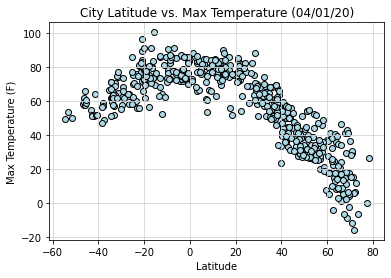

In [9]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="lightblue")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Temperature Plot.png")
plt.show()

## Latitude vs. Humidity Plot

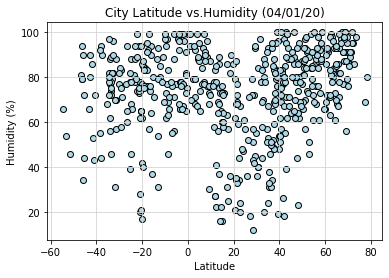

In [10]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="lightblue")
plt.title("City Latitude vs.Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Humidity Plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

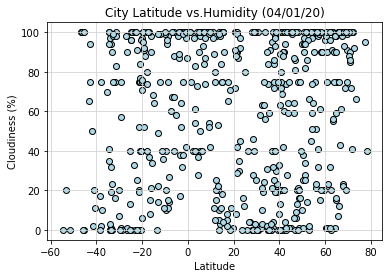

In [11]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="lightblue")
plt.title("City Latitude vs.Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Cloudiness Plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

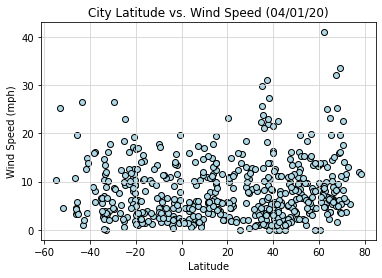

In [12]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="lightblue")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Wind Speed Plot.png")
plt.show()

## Linear Regression

In [13]:
#defined northern vs southern hemishperes

northern_hem_df = weather_df.loc[weather_df["Lat"] > 0]
southern_hem_df = weather_df.loc[weather_df["Lat"] < 0]

In [14]:
#used to check output
northern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,52.30,85,94,2.06,US,1636520095
2,Nanortalik,60.1432,-45.2371,17.65,69,1,9.82,GL,1636520162
3,Söderhamn,61.3037,17.0592,41.36,91,23,8.16,SE,1636520163
4,Kailua,21.4022,-157.7394,78.78,69,90,4.61,US,1636520164
5,Tanout,14.9709,8.8879,78.08,16,18,9.42,NE,1636520164


In [15]:
#used to check output
southern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Ilebo,-4.3167,20.5833,71.67,97,98,0.96,CD,1636520162
6,Lebu,-37.6167,-73.6500,48.96,90,10,5.77,CL,1636520165
7,Karratha,-20.7377,116.8463,89.13,20,0,12.48,AU,1636520165
9,Ushuaia,-54.8000,-68.3000,49.66,66,0,10.36,AR,1636519910
10,Rikitea,-23.1203,-134.9692,75.69,78,100,16.22,PF,1636520167


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-Squared Value is 0.9


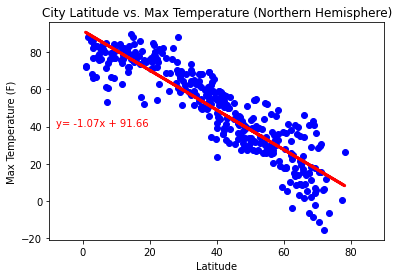

In [16]:
slope, y_int, r_value, p_value, std_err = linregress(northern_hem_df["Lat"], northern_hem_df["Max Temp"])

north_temp_lat = slope * northern_hem_df["Lat"] + y_int

#Regression and r square

north_temp_lat_eq = "y= " + str(round(slope,2)) + "x + " + str(round(y_int,2))

r_square = "R-Squared Value is " + str(abs(round(r_value,2)))
print(r_square)

#scatter plot

plt.scatter(northern_hem_df["Lat"], northern_hem_df["Max Temp"], facecolor = "blue")
plt.plot(northern_hem_df["Lat"], north_temp_lat, color = "red", linewidth = 3)
plt.annotate(north_temp_lat_eq, (-8, 40), color = "red", fontsize = 10)
plt.title("City Latitude vs. Max Temperature (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-10,90)
plt.savefig("Northern Hemisphere Latitude vs. Temperature.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-Squared Value is 0.68


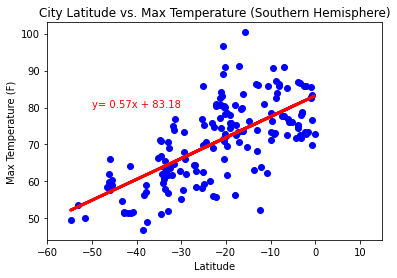

In [17]:
slope, y_int, r_value, p_value, std_err = linregress(southern_hem_df["Lat"], southern_hem_df["Max Temp"])

south_temp_lat = slope * southern_hem_df["Lat"] + y_int

#Regression and r square

south_temp_lat_eq = "y= " + str(round(slope,2)) + "x + " + str(round(y_int,2))

r_square = "R-Squared Value is " + str(abs(round(r_value,2)))
print(r_square)

#scatter plot

plt.scatter(southern_hem_df["Lat"], southern_hem_df["Max Temp"], facecolor = "blue")
plt.plot(southern_hem_df["Lat"], south_temp_lat, color = "red", linewidth = 3)
plt.annotate(south_temp_lat_eq, (-50, 80), color = "red", fontsize = 10)
plt.title("City Latitude vs. Max Temperature (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-60,15)
plt.savefig("Southern Hemisphere Latitude vs. Temperature.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-Squared Value is 0.31


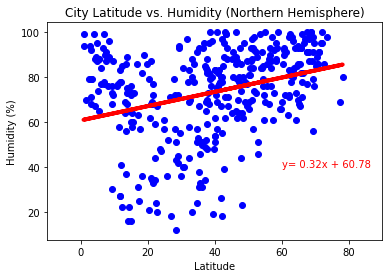

In [18]:
slope, y_int, r_value, p_value, std_err = linregress(northern_hem_df["Lat"], northern_hem_df["Humidity"])

north_temp_lat = slope * northern_hem_df["Lat"] + y_int

#Regression and r square

north_temp_lat_eq = "y= " + str(round(slope,2)) + "x + " + str(round(y_int,2))

r_square = "R-Squared Value is " + str(abs(round(r_value,2)))
print(r_square)

#scatter plot

plt.scatter(northern_hem_df["Lat"], northern_hem_df["Humidity"], facecolor = "blue")
plt.plot(northern_hem_df["Lat"], north_temp_lat, color = "red", linewidth = 4)
plt.annotate(north_temp_lat_eq, (60, 40), color = "red", fontsize = 10)
plt.title("City Latitude vs. Humidity (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-10,90)
plt.savefig("Northern Hemisphere Latitude vs. Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-Squared Value is 0.16


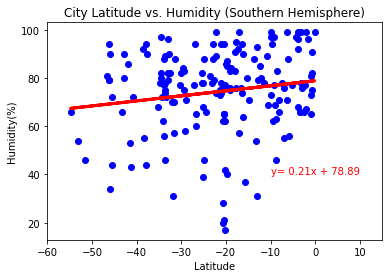

In [19]:
slope, y_int, r_value, p_value, std_err = linregress(southern_hem_df["Lat"], southern_hem_df["Humidity"])

south_temp_lat = slope * southern_hem_df["Lat"] + y_int

#Regression and r square

south_temp_lat_eq = "y= " + str(round(slope,2)) + "x + " + str(round(y_int,2))

r_square = "R-Squared Value is " + str(abs(round(r_value,2)))
print(r_square)

#scatter plot

plt.scatter(southern_hem_df["Lat"], southern_hem_df["Humidity"], facecolor = "blue")
plt.plot(southern_hem_df["Lat"], south_temp_lat, color = "red", linewidth = 3)
plt.annotate(south_temp_lat_eq, (-10, 40), color = "red", fontsize = 10)
plt.title("City Latitude vs. Humidity (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.xlim(-60,15)
plt.savefig("Southern Hemisphere Latitude vs. Humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-Squared Value is 0.08


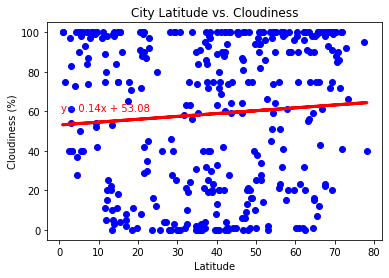

In [20]:
slope, y_int, r_value, p_value, std_err = linregress(northern_hem_df["Lat"], northern_hem_df["Cloudiness"])

north_temp_lat = slope * northern_hem_df["Lat"] + y_int

#Regression and r square

north_temp_lat_eq = "y= " + str(round(slope,2)) + "x + " + str(round(y_int,2))

r_square = "R-Squared Value is " + str(abs(round(r_value,2)))
print(r_square)

#scatter plot

plt.scatter(northern_hem_df["Lat"], northern_hem_df["Cloudiness"], facecolor = "blue")
plt.plot(northern_hem_df["Lat"], north_temp_lat, color = "red", linewidth = 3)
plt.annotate(north_temp_lat_eq, (0.5, 60), color = "red", fontsize = 10)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Northern Hemisphere Latitude vs. Cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-Squared Value is 0.23


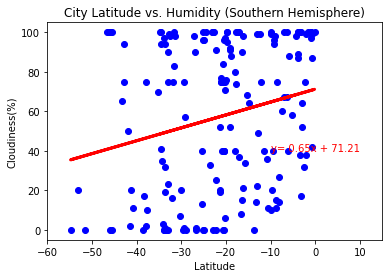

In [21]:
slope, y_int, r_value, p_value, std_err = linregress(southern_hem_df["Lat"], southern_hem_df["Cloudiness"])

south_temp_lat = slope * southern_hem_df["Lat"] + y_int

#Regression and r square

south_temp_lat_eq = "y= " + str(round(slope,2)) + "x + " + str(round(y_int,2))

r_square = "R-Squared Value is " + str(abs(round(r_value,2)))
print(r_square)

#scatter plot

plt.scatter(southern_hem_df["Lat"], southern_hem_df["Cloudiness"], facecolor = "blue")
plt.plot(southern_hem_df["Lat"], south_temp_lat, color = "red", linewidth = 3)
plt.annotate(south_temp_lat_eq, (-10, 40), color = "red", fontsize = 10)
plt.title("City Latitude vs. Humidity (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.xlim(-60,15)
plt.savefig("Southern Hemisphere Latitude vs. Cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-Squared Value is 0.16


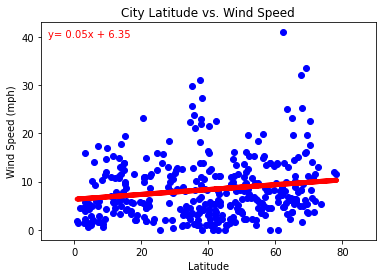

In [22]:
slope, y_int, r_value, p_value, std_err = linregress(northern_hem_df["Lat"], northern_hem_df["Wind Speed"])

north_temp_lat = slope * northern_hem_df["Lat"] + y_int

#Regression and r square

north_temp_lat_eq = "y= " + str(round(slope,2)) + "x + " + str(round(y_int,2))

r_square = "R-Squared Value is " + str(abs(round(r_value,2)))
print(r_square)

#scatter plot

plt.scatter(northern_hem_df["Lat"], northern_hem_df["Wind Speed"], facecolor = "blue")
plt.plot(northern_hem_df["Lat"], north_temp_lat, color = "red", linewidth = 5)
plt.annotate(north_temp_lat_eq, (-8, 40), color = "red", fontsize = 10)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-10,90)
plt.savefig("Northern Hemisphere Latitude vs. Wind Speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-Squared Value is 0.12


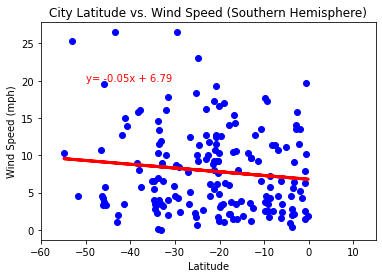

In [23]:
slope, y_int, r_value, p_value, std_err = linregress(southern_hem_df["Lat"], southern_hem_df["Wind Speed"])

south_temp_lat = slope * southern_hem_df["Lat"] + y_int

#Regression and r square

south_temp_lat_eq = "y= " + str(round(slope,2)) + "x + " + str(round(y_int,2))

r_square = "R-Squared Value is " + str(abs(round(r_value,2)))
print(r_square)

#scatter plot

plt.scatter(southern_hem_df["Lat"], southern_hem_df["Wind Speed"], facecolor = "blue")
plt.plot(southern_hem_df["Lat"], south_temp_lat, color = "red", linewidth = 3)
plt.annotate(south_temp_lat_eq, (-50, 20), color = "red", fontsize = 10)
plt.title("City Latitude vs. Wind Speed (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-60,15)
plt.savefig("Southern Hemisphere Latitude vs. Wind Speed.png")
plt.show()